## Part 1: Random Code Construction
Pick $2^k$ random vectors from the binary vector space $\{0, 1\}^n$ where n is the code length and the rate is $\frac{n}{k}$. This is your code C.

In [ ]:
import random
def randomCodeConstructor(List): #Function to generate 2^k random codewords from {0,1}^n
    
    #Obtaining values of n,k,p from the list passed as parameter
    n = List[0]
    k = List[1]
    p = List[2]

    #codeC used to store the codewords generated 
    codeC = []

    #Variable to store the number of codewords generated
    cnt = 0
   
    while(cnt < (2**k)): #Run a loop till we get 2^k codewords
        codeword = [] #Initializing codeword array to store the generated codeword in current iteration
        
        for length in range(n): #Run random.randint(0, 1) n times to get a codeword of length n made of 0s and 1s
            codeword.append(random.randint(0, 1)) #random.randint(0, 1) generates 0 OR 1 randomly
        
        if codeword not in codeC: #Condition to check if the codeword is present in C (code)
            codeC.append(codeword)
            cnt += 1
    return codeC


data = [[15, 10, 0.015]]
C = randomCodeConstructor(data[0])

for i in range(10):
  print(C[i])

[0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1]
[0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1]
[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0]
[1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0]
[1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1]
[1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1]
[1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]
[0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0]
[1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0]


## Part 2: Decoding
1. Pick a random codeword c from the code C. This is your transmitted codeword
2. Simulating BSC channel: Obtain the received vector y by flipping each position of c with probability p.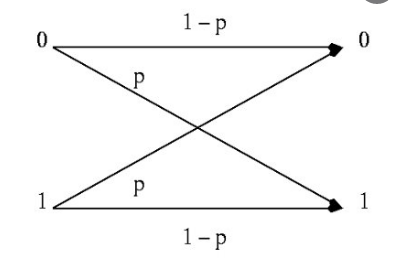

In [ ]:
import random

def BSC(transmittedCodeword, p): #BSC function to simulate working of Binary Symmetric Channel, takes parameters as the codeword and the bit-flip probability (p)
    
    n = len(transmittedCodeword)
    receivedCodeword = [0]*n #Intialize a n length vector of zeros, to store the output of the Binary Symmetric Channel
    

    #Working: For every bit in the transmitted codeword, we generate a random probability. 
    #If the probability of that bit is less than to the bit flip probability, we invert the bit
    #If the probability of that bit is greater than or equal to bit flip probability, we pass the bit as it is (no flipping)
    
    for i in range(n): 
        probabilityofBit = random.random() #Generates a random number between 0 to 1

        if(probabilityofBit < p): #If the probability of that bit is less than to the bit flip probability,
            #Bit Flip Operation
            if(transmittedCodeword[i] == 0): #if bit is 0, 0 is flipped to 1
                receivedCodeword[i] = 1
            elif(transmittedCodeword[i] == 1): #if bit is 1, 1 is flipped to 0
                receivedCodeword[i] = 0
        else:
            receivedCodeword[i] = transmittedCodeword[i]

    return receivedCodeword


transmittedCodword = [1, 0, 0, 1, 0, 1, 1, 1,  0, 1]
bitFlipProbability = 0.3
receivedCodeword = BSC(transmittedCodword, bitFlipProbability)

print(receivedCodeword)


[0, 0, 0, 1, 0, 1, 0, 1, 0, 1]


## Part 2: Decoding
- Run the Minimum Distance Decoding algorithm on y to obtain the estimate ĉ, (This will be the most time
consuming step).
- Maintain a indicator value I for each iteration. This is 1 if decoder made an error, and 0 otherwise.
- Compute E = E + I(ĉ ≠ c)
- Probability of error: Record approximate average probability of error as $P_E$ (n, k, p, C)  = E/N
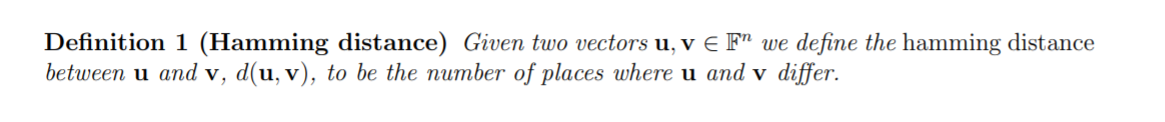

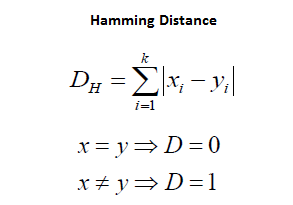

In [47]:
import random
def randomCodeConstructor(List): #Function to generate 2^k random codewords from {0,1}^n
    
    #Obtaining values of n,k,p from the list passed as parameter
    n = List[0]
    k = List[1]
    p = List[2]

    #codeC used to store the codewords generated 
    codeC = []

    #Variable to store the number of codewords generated
    cnt = 0
   
    while(cnt < (2**k)): #Run a loop till we get 2^k codewords
        codeword = [] #Initializing codeword array to store the generated codeword in current iteration
        
        for length in range(n): #Run random.randint(0, 1) n times to get a codeword of length n made of 0s and 1s
            codeword.append(random.randint(0, 1)) #random.randint(0, 1) generates 0 OR 1 randomly
        
        if codeword not in codeC: #Condition to check if the codeword is present in C (code)
            codeC.append(codeword)
            cnt += 1
    return codeC

def BSC(transmittedCodeword, p): #BSC function to simulate working of Binary Symmetric Channel, takes parameters as the codeword and the bit-flip probability (p)
    
    n = len(transmittedCodeword)
    receivedCodeword = [0]*n #Intialize a n length vector of zeros, to store the output of the Binary Symmetric Channel
    

    #Working: For every bit in the transmitted codeword, we generate a random probability. 
    #If the probability of that bit is less than to the bit flip probability, we invert the bit
    #If the probability of that bit is greater than or equal to bit flip probability, we pass the bit as it is (no flipping)
    
    for i in range(n): 
        probabilityofBit = random.random() #Generates a random number between 0 to 1

        if(probabilityofBit < p): #If the probability of that bit is less than to the bit flip probability,
            #Bit Flip Operation
            if(transmittedCodeword[i] == 0): #if bit is 0, 0 is flipped to 1
                receivedCodeword[i] = 1
            elif(transmittedCodeword[i] == 1): #if bit is 1, 1 is flipped to 0
                receivedCodeword[i] = 0
        else:
            receivedCodeword[i] = transmittedCodeword[i]

    return receivedCodeword

def minimumDistanceDecodingAlgorithm(transmittedCodeword,receivedCodeword, codeC):
    
    n = len(receivedCodeword)
    minimumHammingDistance = n #Assigning the maximum hamming distance between two vectors, when all the bits are different
    
    estimateCodewordIndex = 0
    E = 0

    for t in range(len(codeC)):  # Iterating through all codewords in C to compare which codeword has minimum hamming distance with Received Codeword
        hammingDistance = 0
        
        for ind in range(n):
            if(receivedCodeword[ind] != codeC[t][ind]): #Comparing the index of bit ind in the t th codeword
                hammingDistance += 1
        
        if hammingDistance < minimumHammingDistance:  # If current hamming Distance obtained is lesser than stored difference,
            estimateCodewordIndex = t  # store the index of the new difference
            minimumHammingDistance = hammingDistance  # we update the minimum difference
    
    estimateCodeword = codeC[estimateCodewordIndex]
    
    if(estimateCodeword != transmittedCodeword):  # If the estimated codeword does not match the input codeword, we increment error
        E += 1  # E - Number of errors in decoding by the decoding algorithm
    
    return E


def decoding(codeC, data):
    n = data[0]
    k = data[1]
    p = data[2]

    N = 100

    totalError = 0
    minimumProbabilityOfError = 1000 #whats the max value of E/N = k/N ?

    for i in range(N):
        #codewordIndex = random.randint(0, (2**k-1)
        #transmittedCodeword = codeC[codewordIndex]

        cur = random.randint(0, (2**k)-1)
        c = codeC[cur]
        transmittedCodeword = c

        bitFlipProbability = p
        receivedCodeword = BSC(transmittedCodeword, bitFlipProbability)

        totalError = totalError +  minimumDistanceDecodingAlgorithm(transmittedCodeword,receivedCodeword, codeC)

    probabilityOfError = totalError / N
    return probabilityOfError



#data = [15, 10, 0.015]

print('Enter value for n,k,p')
n = input()
k = input()
p = input()

codeC = randomCodeConstructor(data)
probabilityOfError = decoding(codeC, data)

print('The probability of Error for n = ' + n + ' k = ' + k + ' p = ' + p)
print(probabilityOfError)


Enter value for n,k,p
15
10
0.015
The probability of Error for n = 15 k = 10 p = 0.015
0.05


## Final Code 


In [ ]:
import random
def randomCodeConstructor(List): #Function to generate 2^k random codewords from {0,1}^n
    
    #Obtaining values of n,k,p from the list passed as parameter
    n = List[0]
    k = List[1]
    p = List[2]

    #codeC used to store the codewords generated 
    codeC = []

    #Variable to store the number of codewords generated
    cnt = 0
   
    while(cnt < (2**k)): #Run a loop till we get 2^k codewords
        codeword = [] #Initializing codeword array to store the generated codeword in current iteration
        
        for length in range(n): #Run random.randint(0, 1) n times to get a codeword of length n made of 0s and 1s
            codeword.append(random.randint(0, 1)) #random.randint(0, 1) generates 0 OR 1 randomly
        
        if codeword not in codeC: #Condition to check if the codeword is present in C (code)
            codeC.append(codeword)
            cnt += 1
    return codeC

def BSC(transmittedCodeword, p): #BSC function to simulate working of Binary Symmetric Channel, takes parameters as the codeword and the bit-flip probability (p)
    
    n = len(transmittedCodeword)
    receivedCodeword = [0]*n #Intialize a n length vector of zeros, to store the output of the Binary Symmetric Channel
    

    #Working: For every bit in the transmitted codeword, we generate a random probability. 
    #If the probability of that bit is less than to the bit flip probability, we invert the bit
    #If the probability of that bit is greater than or equal to bit flip probability, we pass the bit as it is (no flipping)
    
    for i in range(n): 
        probabilityofBit = random.random() #Generates a random number between 0 to 1

        if(probabilityofBit < p): #If the probability of that bit is less than to the bit flip probability,
            #Bit Flip Operation
            if(transmittedCodeword[i] == 0): #if bit is 0, 0 is flipped to 1
                receivedCodeword[i] = 1
            elif(transmittedCodeword[i] == 1): #if bit is 1, 1 is flipped to 0
                receivedCodeword[i] = 0
        else:
            receivedCodeword[i] = transmittedCodeword[i]

    return receivedCodeword

def minimumDistanceDecodingAlgorithm(transmittedCodeword,receivedCodeword, codeC):
    
    n = len(receivedCodeword)
    minimumHammingDistance = n #Assigning the maximum hamming distance between two vectors, when all the bits are different
    
    estimateCodewordIndex = 0
    E = 0

    for t in range(len(codeC)):  # Iterating through all codewords in C to compare which codeword has minimum hamming distance with Received Codeword
        hammingDistance = 0
        
        for ind in range(n):
            if(receivedCodeword[ind] != codeC[t][ind]): #Comparing the index of bit ind in the t th codeword
                hammingDistance += 1
        
        if hammingDistance < minimumHammingDistance:  # If current hamming Distance obtained is lesser than stored difference,
            estimateCodewordIndex = t  # store the index of the new difference
            minimumHammingDistance = hammingDistance  # we update the minimum difference
    
    estimateCodeword = codeC[estimateCodewordIndex]
    
    if(estimateCodeword != transmittedCodeword):  # If the estimated codeword does not match the input codeword, we increment error
        E += 1  # E - Number of errors in decoding by the decoding algorithm
    
    return E


def decoding(codeC, data):
    n = data[0]
    k = data[1]
    p = data[2]

    N = 100

    totalError = 0
    minimumProbabilityOfError = 1000 #whats the max value of E/N = k/N ?

    for i in range(N):
        #codewordIndex = random.randint(0, (2**k-1)
        #transmittedCodeword = codeC[codewordIndex]

        cur = random.randint(0, (2**k)-1)
        c = codeC[cur]
        transmittedCodeword = c

        bitFlipProbability = p
        receivedCodeword = BSC(transmittedCodeword, bitFlipProbability)

        totalError = totalError +  minimumDistanceDecodingAlgorithm(transmittedCodeword,receivedCodeword, codeC)

    probabilityOfError = totalError / N
    return probabilityOfError

data = [[15, 10, 0.015],
        [15, 10, 0.1],
        [15, 10, 0.45],
        [20, 10, 0.015],
        [20, 10, 0.1],
        [20, 10, 0.45]
        ]
for i in range(6):
    minimumProbabilityOfError = 10
    n = data[i][0]
    k = data[i][1]
    p = data[i][2]  
    print('For n = ', n, 'k = ', k, 'p = ', p)
    for j in range(5):
        codeC = randomCodeConstructor(data[i])
        probabilityOfError = decoding(codeC, data[i])
        print('Trial' , j+1, ': The probability of Error for n = ' , n , ' k = ' , k , ' p = ' , p)
        print ('%.3f' % probabilityOfError)
        print('\n')
        minimumProbabilityOfError = min(minimumProbabilityOfError, probabilityOfError)
 
    print('The minimum probability of Error for n = ' , n , ' k = ' , k , ' p = ' , p)
    print ('%.3f' % minimumProbabilityOfError)
    print('\n\n')


## Plotting


In [73]:
import random
import numpy as np
import matplotlib.pyplot as plt

def randomCodeConstructor(List): #Function to generate 2^k random codewords from {0,1}^n
    
    #Obtaining values of n,k,p from the list passed as parameter
    n = List[0]
    k = List[1]
    p = List[2]

    #codeC used to store the codewords generated 
    codeC = []

    #Variable to store the number of codewords generated
    cnt = 0
   
    while(cnt < (2**k)): #Run a loop till we get 2^k codewords
        codeword = [] #Initializing codeword array to store the generated codeword in current iteration
        
        for length in range(n): #Run random.randint(0, 1) n times to get a codeword of length n made of 0s and 1s
            codeword.append(random.randint(0, 1)) #random.randint(0, 1) generates 0 OR 1 randomly
        
        if codeword not in codeC: #Condition to check if the codeword is present in C (code)
            codeC.append(codeword)
            cnt += 1
    return codeC

def BSC(transmittedCodeword, p): #BSC function to simulate working of Binary Symmetric Channel, takes parameters as the codeword and the bit-flip probability (p)
    
    n = len(transmittedCodeword)
    receivedCodeword = [0]*n #Intialize a n length vector of zeros, to store the output of the Binary Symmetric Channel
    

    #Working: For every bit in the transmitted codeword, we generate a random probability. 
    #If the probability of that bit is less than to the bit flip probability, we invert the bit
    #If the probability of that bit is greater than or equal to bit flip probability, we pass the bit as it is (no flipping)
    
    for i in range(n): 
        probabilityofBit = random.random() #Generates a random number between 0 to 1

        if(probabilityofBit < p): #If the probability of that bit is less than to the bit flip probability,
            #Bit Flip Operation
            if(transmittedCodeword[i] == 0): #if bit is 0, 0 is flipped to 1
                receivedCodeword[i] = 1
            elif(transmittedCodeword[i] == 1): #if bit is 1, 1 is flipped to 0
                receivedCodeword[i] = 0
        else:
            receivedCodeword[i] = transmittedCodeword[i]

    return receivedCodeword

def minimumDistanceDecodingAlgorithm(transmittedCodeword,receivedCodeword, codeC):
    
    n = len(receivedCodeword)
    minimumHammingDistance = n #Assigning the maximum hamming distance between two vectors, when all the bits are different
    
    estimateCodewordIndex = 0
    E = 0

    for t in range(len(codeC)):  # Iterating through all codewords in C to compare which codeword has minimum hamming distance with Received Codeword
        hammingDistance = 0
        
        for ind in range(n):
            if(receivedCodeword[ind] != codeC[t][ind]): #Comparing the index of bit ind in the t th codeword
                hammingDistance += 1
        
        if hammingDistance < minimumHammingDistance:  # If current hamming Distance obtained is lesser than stored difference,
            estimateCodewordIndex = t  # store the index of the new difference
            minimumHammingDistance = hammingDistance  # we update the minimum difference
    
    estimateCodeword = codeC[estimateCodewordIndex]
    
    if(estimateCodeword != transmittedCodeword):  # If the estimated codeword does not match the input codeword, we increment error
        E += 1  # E - Number of errors in decoding by the decoding algorithm
    
    return E


def decoding(codeC, data):
    n = data[0]
    k = data[1]
    p = data[2]

    N = 100

    totalError = 0
    minimumProbabilityOfError = 1000 #whats the max value of E/N = k/N ?

    for i in range(N):
        #codewordIndex = random.randint(0, (2**k-1)
        #transmittedCodeword = codeC[codewordIndex]

        cur = random.randint(0, (2**k)-1)
        c = codeC[cur]
        transmittedCodeword = c

        bitFlipProbability = p
        receivedCodeword = BSC(transmittedCodeword, bitFlipProbability)

        totalError = totalError +  minimumDistanceDecodingAlgorithm(transmittedCodeword,receivedCodeword, codeC)

    probabilityOfError = totalError / N
    return probabilityOfError

#For constant value of k,p, and varying codeword length (n)
data = [[10, 10, 0.1],
        [12, 10, 0.1],
        [15, 10, 0.1],
        [17, 10, 0.1],
        [18, 10, 0.1],
        [20, 10, 0.1]
        ]

pdata = []

for i in range(6):
    minimumProbabilityOfError = 10
    n = data[i][0]
    k = data[i][1]
    p = data[i][2]  
    #print('For n = ', n, 'k = ', k, 'p = ', p)
    for j in range(5):
        codeC = randomCodeConstructor(data[i])
        probabilityOfError = decoding(codeC, data[i])
    #    print('Trial' , j+1, ': The probability of Error for n = ' , n , ' k = ' , k , ' p = ' , p)
     #   print ('%.3f' % probabilityOfError)
      #  print('\n')
        minimumProbabilityOfError = min(minimumProbabilityOfError, probabilityOfError)

    print('The minimum probability of Error for n = ' , n , ' k = ' , k , ' p = ' , p)
    print ('%.3f' % minimumProbabilityOfError)
    pdata.append(minimumProbabilityOfError)
    print('\n\n')


#plt.plot(x, y, color ="red")
x = []
for i in range(6):
  x.append(data[i][0])
plt.plot(x,pdata)
plt.axis([10, 20, 0, 1])

#1 As N increases for fixed k,p the p(error) decreases
#2 Do for p
#3 Do for k

The minimum probability of Error for n =  10  k =  10  p =  0.1
0.600



The minimum probability of Error for n =  12  k =  10  p =  0.1
0.530





KeyboardInterrupt: ignored

The minimum probability of Error for n =  15  k =  10  p =  0.01
0.010



The minimum probability of Error for n =  15  k =  10  p =  0.1
0.400



The minimum probability of Error for n =  15  k =  10  p =  0.3
0.950



The minimum probability of Error for n =  15  k =  10  p =  0.5
1.000



The minimum probability of Error for n =  15  k =  10  p =  0.75
1.000



The minimum probability of Error for n =  15  k =  10  p =  0.9
1.000





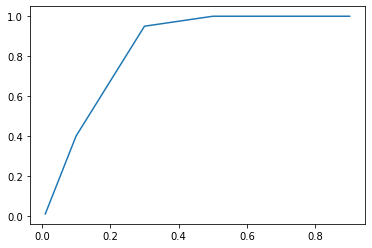

In [75]:
import random
import numpy as np
import matplotlib.pyplot as plt

def randomCodeConstructor(List): #Function to generate 2^k random codewords from {0,1}^n
    
    #Obtaining values of n,k,p from the list passed as parameter
    n = List[0]
    k = List[1]
    p = List[2]

    #codeC used to store the codewords generated 
    codeC = []

    #Variable to store the number of codewords generated
    cnt = 0
   
    while(cnt < (2**k)): #Run a loop till we get 2^k codewords
        codeword = [] #Initializing codeword array to store the generated codeword in current iteration
        
        for length in range(n): #Run random.randint(0, 1) n times to get a codeword of length n made of 0s and 1s
            codeword.append(random.randint(0, 1)) #random.randint(0, 1) generates 0 OR 1 randomly
        
        if codeword not in codeC: #Condition to check if the codeword
            codeC.append(codeword)
            cnt += 1
    return codeC

def BSC(transmittedCodeword, p): #BSC function to simulate working of Binary Symmetric Channel, takes parameters as the codeword and the bit-flip probability (p)
    
    n = len(transmittedCodeword)
    receivedCodeword = [0]*n #Intialize a n length vector of zeros, to store the output of the Binary Symmetric Channel
    

    #Working: For every bit in the transmitted codeword, we generate a random probability. 
    #If the probability of that bit is less than to the bit flip probability, we invert the bit
    #If the probability of that bit is greater than or equal to bit flip probability, we pass the bit as it is (no flipping)
    
    for i in range(n): 
        probabilityofBit = random.random() #Generates a random number between 0 to 1

        if(probabilityofBit < p): #If the probability of that bit is less than to the bit flip probability,
            #Bit Flip Operation
            if(transmittedCodeword[i] == 0): #if bit is 0, 0 is flipped to 1
                receivedCodeword[i] = 1
            elif(transmittedCodeword[i] == 1): #if bit is 1, 1 is flipped to 0
                receivedCodeword[i] = 0
        else:
            receivedCodeword[i] = transmittedCodeword[i]

    return receivedCodeword

def minimumDistanceDecodingAlgorithm(transmittedCodeword,receivedCodeword, codeC):
    
    n = len(receivedCodeword)
    minimumHammingDistance = n #Assigning the maximum hamming distance between two vectors, when all the bits are different
    
    estimateCodewordIndex = 0
    E = 0

    for t in range(len(codeC)):  # Iterating through all codewords in C to compare which codeword has minimum hamming distance with Received Codeword
        hammingDistance = 0
        
        for ind in range(n):
            if(receivedCodeword[ind] != codeC[t][ind]): #Comparing the index of bit ind in the t th codeword
                hammingDistance += 1
        
        if hammingDistance < minimumHammingDistance:  # If current hamming Distance obtained is lesser than stored difference,
            estimateCodewordIndex = t  # store the index of the new difference
            minimumHammingDistance = hammingDistance  # we update the minimum difference
    
    estimateCodeword = codeC[estimateCodewordIndex]
    
    if(estimateCodeword != transmittedCodeword):  # If the estimated codeword does not match the input codeword, we increment error
        E += 1  # E - Number of errors in decoding by the decoding algorithm
    
    return E


def decoding(codeC, data):
    n = data[0]
    k = data[1]
    p = data[2]

    N = 100

    totalError = 0
    minimumProbabilityOfError = 1000 #whats the max value of E/N = k/N ?

    for i in range(N):
        #codewordIndex = random.randint(0, (2**k-1)
        #transmittedCodeword = codeC[codewordIndex]

        cur = random.randint(0, (2**k)-1)
        c = codeC[cur]
        transmittedCodeword = c

        bitFlipProbability = p
        receivedCodeword = BSC(transmittedCodeword, bitFlipProbability)

        totalError = totalError +  minimumDistanceDecodingAlgorithm(transmittedCodeword,receivedCodeword, codeC)

    probabilityOfError = totalError / N
    return probabilityOfError

#For constant value of k,p, and varying codeword length (n)
data = [[15, 10, 0.01],
        [15, 10, 0.1],
        [15, 10, 0.3],
        [15, 10, 0.5],
        [15, 10, 0.75],
        [15, 10, 0.9]
        ]

pdata = []

for i in range(6):
    minimumProbabilityOfError = 10
    n = data[i][0]
    k = data[i][1]
    p = data[i][2]  
    #print('For n = ', n, 'k = ', k, 'p = ', p)
    for j in range(5):
        codeC = randomCodeConstructor(data[i])
        probabilityOfError = decoding(codeC, data[i])
    #    print('Trial' , j+1, ': The probability of Error for n = ' , n , ' k = ' , k , ' p = ' , p)
     #   print ('%.3f' % probabilityOfError)
      #  print('\n')
        minimumProbabilityOfError = min(minimumProbabilityOfError, probabilityOfError)

    print('The minimum probability of Error for n = ' , n , ' k = ' , k , ' p = ' , p)
    print ('%.3f' % minimumProbabilityOfError)
    pdata.append(minimumProbabilityOfError)
    print('\n\n')


#plt.plot(x, y, color ="red")
x = []
for i in range(6):
  x.append(data[i][2])
plt.plot(x,pdata)
#plt.axis([10, 20, 0, 1])

#1 As N increases for fixed k,p the p(error) decreases
#2 Do for p
#3 Do for k